# Decision Trees

Como vimos antes, los árboles de decisión van dividiendo nuestra base en las categorías predefinidas basados en preguntas/características que son verdaderas o falsas para cada observación. Vamos a utilizar una base de datos de atributis de canciones en Spotify ( https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/ ), para tratar de identificar si a X persona le gustará una canción dadas ciertas características o no.

In [18]:
import numpy as np
import pandas as pd

###### Leémos la base de datos

In [19]:
spotify = pd.read_csv('data_spotify.csv')
spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [20]:
spotify = spotify.iloc[:, 1:]
spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [21]:
spotify.shape

(2017, 16)

###### Nuestra etiqueta de si gusta o no la canción es 'target', donde 1 es "Me gusta" y 0 "No me gusta"

In [22]:
spotify['target'].value_counts(), spotify['target'].value_counts(normalize = True)

(1    1020
 0     997
 Name: target, dtype: int64, 1    0.505702
 0    0.494298
 Name: target, dtype: float64)

Se ven más o menos balanceados nuestros grupos: 50.6% de sí vs 49.4% de no. Sigue que dividamos nuestra base de datos dos veces. La primera para separar atributos de etiquetas, la segunda para separar set de entrenamiento del de prueba.

Para probar vamos a imaginar primero que tenemos unicamente 3 caracteristicas de la canción: qué tan acustica es la canción, que tan bailable es, y su duración.

In [23]:
X = spotify[['acousticness', 'danceability', 'duration_ms']]
X.head()

,acousticness,danceability,duration_ms
0,0.0102,0.833,204600
1,0.1990,0.743,326933
2,0.0344,0.838,185707
3,0.6040,0.494,199413
4,0.1800,0.678,392893


In [24]:
y = spotify.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

###### Ahora ya que dividimos la base en atributos y etiqutas, vamos a dividir la base en dos. Por convención dejemos el 80% de la base para entrenar al algoritmo, y 20% para hacer la prueba de qué tan bien clasificó nuestro árbol de decisión.

In [25]:
from sklearn.model_selection import train_test_split # solito hace un muestreo aleatorio

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [26]:
len(spotify)

2017

In [27]:
len(y_train), len(y_test)

(1613, 404)

In [28]:
1613 + 404

2017

###### Importemos el algoritmo de clasificación y ajustemos el modelo

In [29]:
from sklearn import tree

In [30]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 3) # Le digo que máximo haga 2 "pasos" en 
                                                      # el árbol. Acuérdensé que si no limitamos 
                                                      # cosas los árboles tienden a hacer 
                                                      # overfit a los datos de entrenamiento

In [31]:
# Ahora sí entreno a mi árbol. Al entrenar van a poder ver las opciones de parámetros que podemos ajustar
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Veamos visualmente cómo quedó el árbol

In [32]:
# conda install graphviz
# conda install python-graphviz

import graphviz 

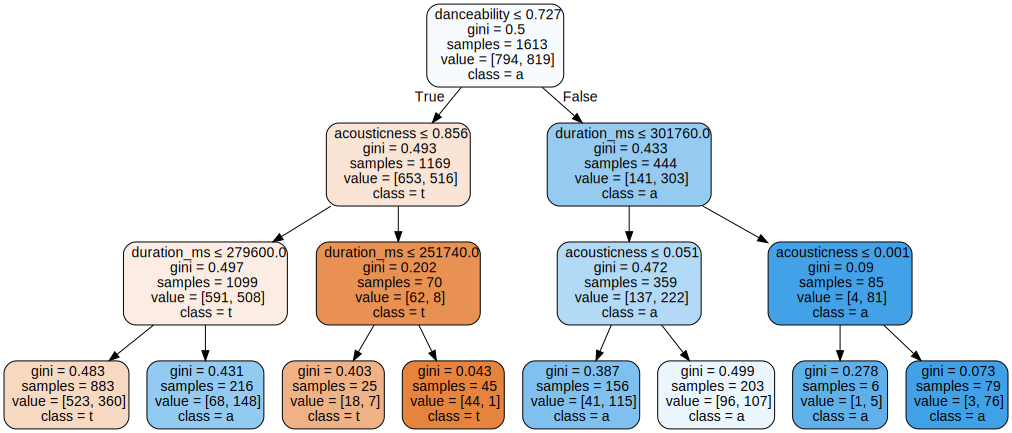

In [33]:
dot_data = tree.export_graphviz(tree_clf, out_file = None, 
                         feature_names = X.columns,  
                         class_names = y.name,  
                         filled = True, rounded = True,  
                         special_characters = True)  

graph = graphviz.Source(dot_data)  

graph 

###### Predicciónes para hacer pruebas

In [34]:
y_pred = tree_clf.predict(x_test)

###### Y algunas medidas de qué tan bien clasificamos

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.6163366336633663


In [36]:
print(confusion_matrix(y_test, y_pred))

[[150  53]
 [102  99]]


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66       203
           1       0.65      0.49      0.56       201

   micro avg       0.62      0.62      0.62       404
   macro avg       0.62      0.62      0.61       404
weighted avg       0.62      0.62      0.61       404



###### 60%... suena a que está medio mal nuestro modelo. Probemos metiendo todas las variables

In [283]:
spotify = pd.read_csv('data_spotify.csv')
spotify = spotify.iloc[:, 1:]
spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [284]:
X = spotify.iloc[:, :13]
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [285]:
y = spotify.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [286]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [287]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 5)

tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

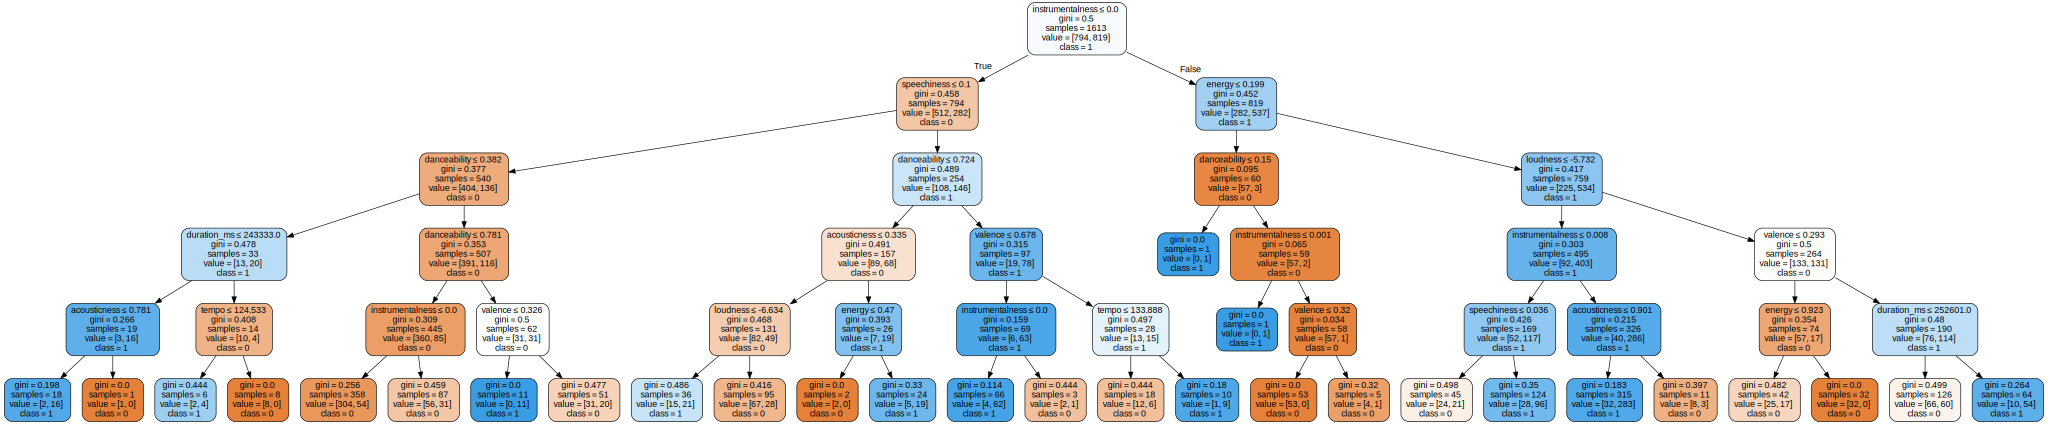

In [288]:
dot_data = tree.export_graphviz(tree_clf, out_file = None, 
                         feature_names = X.columns,  
                         class_names = ['0', '1'],  
                         filled = True, rounded = True,  
                         special_characters = True)  

graph = graphviz.Source(dot_data)  

graph 

In [289]:
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.6163366336633663


In [290]:
print(confusion_matrix(y_test, y_pred))

[[150  53]
 [102  99]]


In [291]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.60      0.74      0.66       203
          1       0.65      0.49      0.56       201

avg / total       0.62      0.62      0.61       404



Juguemos con los parámetros (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), a ver quién ajusta mejor el modelo y por qué. Quizá un árbol de decisión no sea un mejor modelo para estos datos, pero probaremos con otros más adelante.